In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("zoo.csv")

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
x=df.drop(["animal_name","class_type"],axis=1)

In [5]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [6]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


Text(0.5, 0, 'Animals')

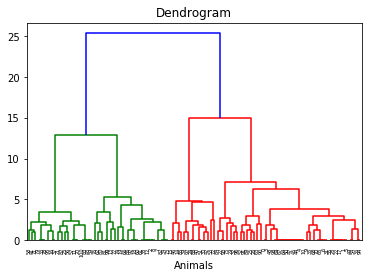

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Animals")

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=7,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(x)

In [9]:
y_hc

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

In [10]:
labels_true = df["class_type"]

In [11]:
labels_pred = y_hc

In [12]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true, labels_pred)

0.695825088191842

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_true,labels_pred)

7.673267326732673